<a href="https://colab.research.google.com/github/Muhammadyusuf2580/MachineLearning/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Kutubxonalarni chaqirish
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score


In [ ]:
# 2. Tasodifiy (synthetic) dataset yaratamiz
np.random.seed(42)
num_samples = 300

In [ ]:
# Xususiyatlar (Features)
ram = np.random.randint(2, 13, num_samples)  # RAM in GB
camera = np.random.randint(5, 110, num_samples)  # Camera MP
battery = np.random.randint(2500, 6000, num_samples)  # Battery in mAh

In [ ]:
# Narx (Target): RAM, Kamera va Batareya asosida hisoblanadi + noise
price = (ram * 25) + (camera * 5) + (battery * 0.08) + np.random.normal(0, 50, num_samples)


In [ ]:
# DataFrame hosil qilamiz
df = pd.DataFrame({
    'RAM': ram,
    'Camera_MP': camera,
    'Battery_mAh': battery,
    'Price_USD': price
})

In [ ]:
# 3. Train/Test uchun ajratamiz
X = df[['RAM', 'Camera_MP', 'Battery_mAh']]
y = df['Price_USD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 4. Random Forest Regressorni o‘qitamiz
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# 5. Bashorat qilamiz
y_pred = model.predict(X_test)

In [ ]:
# 6. Modelni baholaymiz
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f} USD")
print(f"R² score: {r2:.2f}")

MAE: 54.60 USD
R² score: 0.88


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


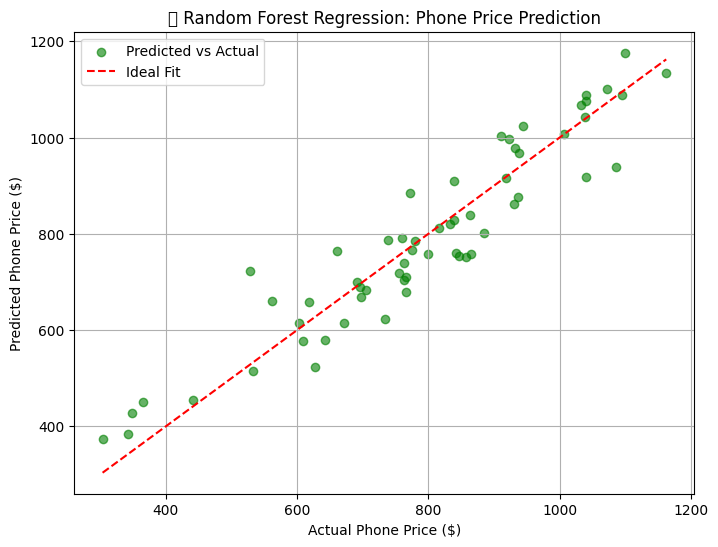

In [ ]:
# 7. Grafik: Haqiqiy narx vs Bashorat qilingan narx
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green', label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Ideal Fit")
plt.xlabel("Actual Phone Price ($)")
plt.ylabel("Predicted Phone Price ($)")
plt.title("📱 Random Forest Regression: Phone Price Prediction")
plt.legend()
plt.grid(True)
plt.show()